# Da Vinci Satellite: Bonaire Day Post Briefing Lecture

De inhoud die werd gecreëerd is de briefinglezing voorafgaand aan de excursie naar het grondstation. De inhoud toont informatieverwerking, filtering, modulatie en behandelt de inhoud van ruis.

# Modulatie en ruiseffecten

We weten dat modulatie ons in staat stelt om informatie te coderen in een signaal met een hogere frequentie, waardoor we de informatie met minder vermogen kunnen verzenden!

Laten we dus een willekeurig signaal genereren dat gebruikt zou kunnen worden. Voor dit signaal nemen we aan dat de satelliet zijn batterijniveau terugstuurt.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

In [3]:
time = np.linspace(0, 1, 1000)
battery_level = 100 * np.exp(-0.97 * time) + np.abs(np.sin(2 * np.pi * 5 * time))
yhat = savgol_filter(battery_level, 100, 5)

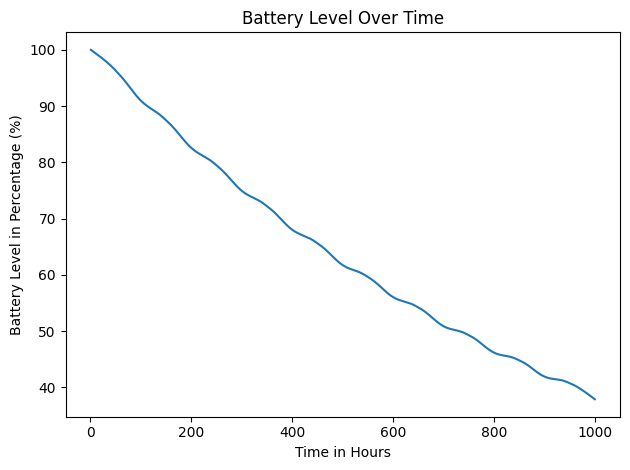

In [4]:
plt.plot([i+1 for i in range(len(yhat))], yhat)
plt.title('Battery Level Over Time')
plt.xlabel('Time in Hours')
plt.ylabel('Battery Level in Percentage (%)')
plt.tight_layout()

*Opdracht 1:* Hoe ziet het signaal eruit? Is het een lineair signaal, een kwadratisch signaal of een andere vorm?

Nu gaan we een golf met een zeer hoge frequentie genereren om onze informatie in te coderen. Dit wordt onze draaggolf en we maken er een cosinusfunctie van met een frequentie die hoog genoeg is.

In [5]:
time = np.linspace(0, 1, 1000)
f = 12.5 # Hertz
a_c = 1.4
carrier_wave = a_c * np.cos([2*np.pi*f*t for t in time])

*Opdracht 2:* Probeer de frequentie van de golf te verhogen. Verdubbel hem, verdrievoudig hem en maak hem tien keer zo hoog als het origineel. Hoe verandert de golf?

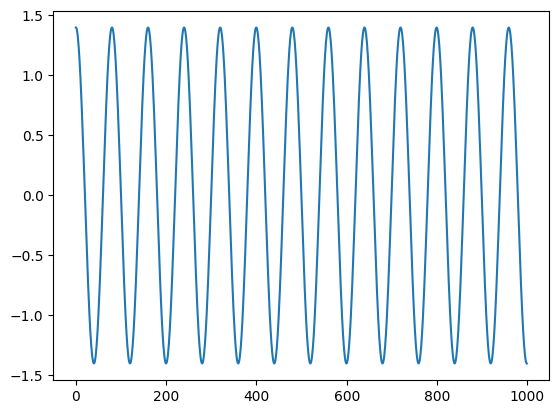

In [6]:
plt.plot(carrier_wave)

Als we ze samen moduleren, kunnen we nu dezelfde informatie verzenden, maar met meer frequentie en dus minder vermogen! Modulatie in termen van amplitude kan worden gedaan met de volgende formule:

$$ x_{mod} = (A_{carrier} + x_{information}) \cdot \cos{(\omega_{c}t)} $$

In [7]:
x_mod = (a_c + battery_level) * np.cos([2*np.pi*f*t for t in time])

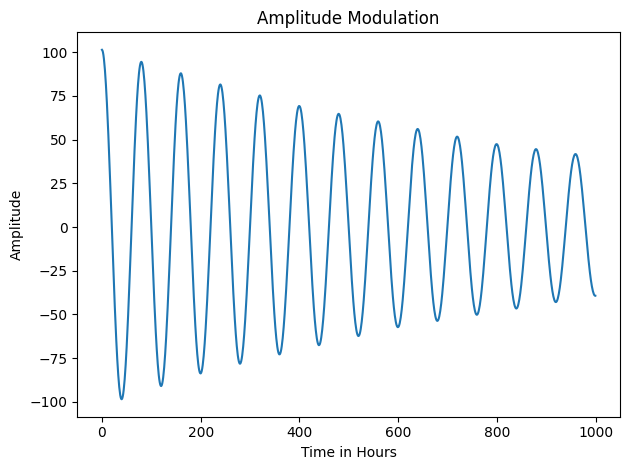

In [8]:
plt.plot(x_mod)
plt.title('Amplitude Modulation')
plt.xlabel('Time in Hours')
plt.ylabel('Amplitude')
plt.tight_layout()

We kunnen er ook voor kiezen om de informatie te frequentiemoduleren. Hierbij wordt de frequentie van de draaggolf aangepast om de informatie te dragen.

$$ x_{mod} = A_{carrier}\cos(\omega_c t + x_{information})$$

In [9]:
x_mod_f = a_c * np.cos([(2*np.pi*f + battery_level[idx])*t  for idx, t in enumerate(time)])

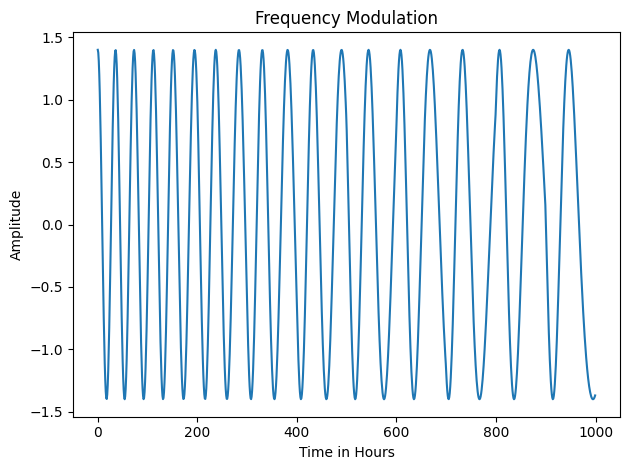

In [10]:
plt.plot(x_mod_f)
plt.title('Frequency Modulation')
plt.xlabel('Time in Hours')
plt.ylabel('Amplitude')
plt.tight_layout()

## Noise

Vervolgens gaan we een soort ruis genereren die wordt veroorzaakt in de signaaloverdracht. Deze ruis is representatief voor de gecombineerde effecten van:

*Opdract 3:* wat kunnen de geluidsbronnen zijn?


In [11]:
noise_strength = 0.1

noise = noise_strength * np.random.normal(0,np.std(battery_level, ddof=1),len(time))

Laten we eens kijken hoe het geluid eruit ziet!

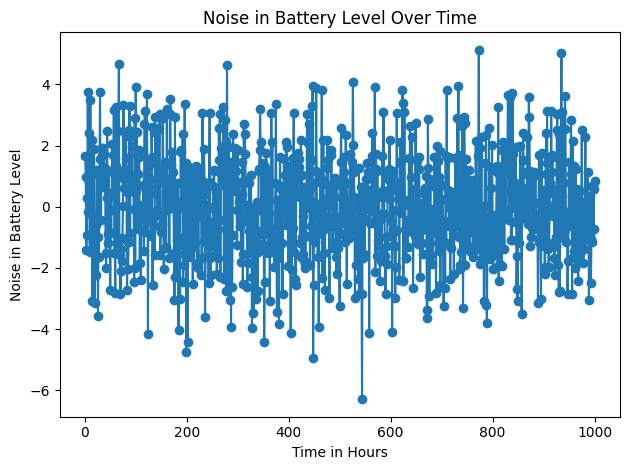

In [12]:
plt.plot([i+1 for i in range(len(noise))], noise, marker='o')
plt.title('Noise in Battery Level Over Time')
plt.xlabel('Time in Hours')
plt.ylabel('Noise in Battery Level')
plt.tight_layout()

Ga terug en verander de `noise_strength` parameter in een hogere waarde. Wat zie je dat er gebeurt?

We voegen dit geluid toe aan onze informatie en kijken hoe het wordt beïnvloed.

In [13]:
corrupted = yhat + noise

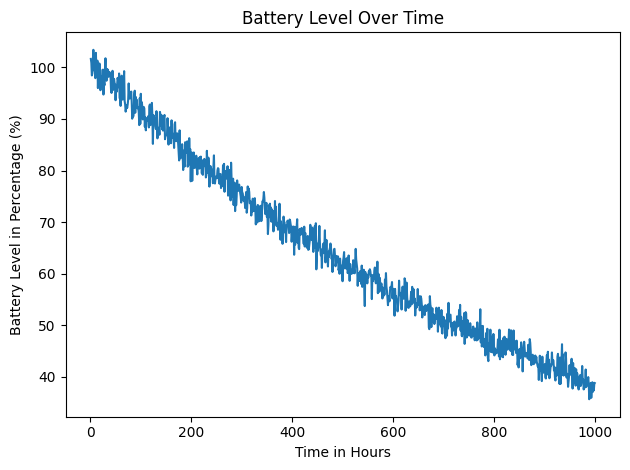

In [14]:
plt.plot([i+1 for i in range(len(corrupted))], corrupted)
plt.title('Battery Level Over Time')
plt.xlabel('Time in Hours')
plt.ylabel('Battery Level in Percentage (%)')
plt.tight_layout()

*Opdracht 4:* En als we het signaalvermogen variëren, wat voor invloed heeft dat dan op het signaal? Voer het onderstaande codeblok uit om.

In [15]:
corrupted_signals = []
for ns in [0.1, 0.4, 0.8]:
    noise_selected = ns * np.random.normal(0,np.std(battery_level, ddof=1),len(time))
    corruption = yhat + noise_selected
    corrupted_signals.append(corruption)

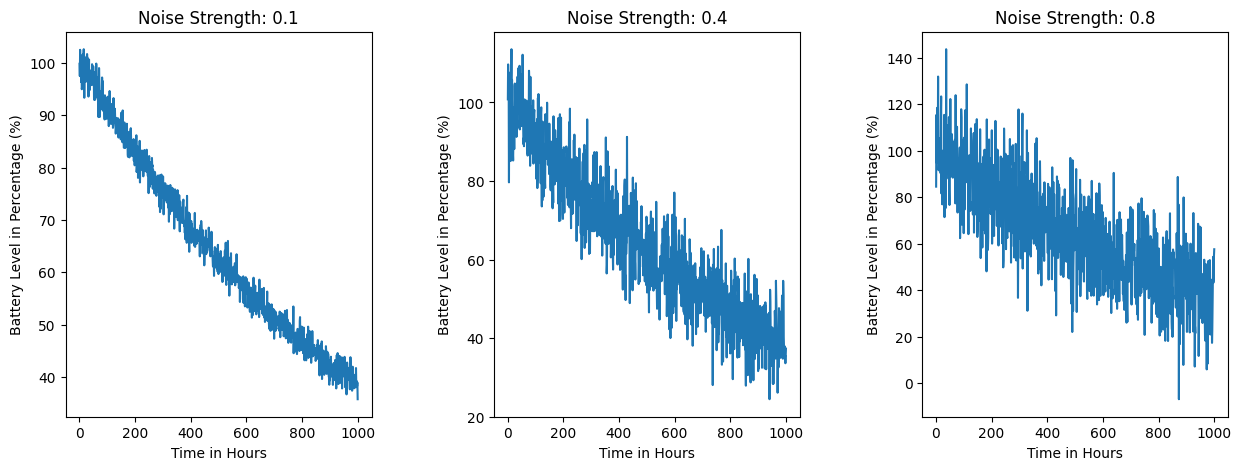

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(len(ax)):
    line, = ax[i].plot([j+1 for j in range(len(corrupted_signals[i]))], corrupted_signals[i])
    ax[i].set_title('Noise Strength: {}'.format([0.1, 0.4, 0.8][i]))
    ax[i].set_xlabel('Time in Hours')
    ax[i].set_ylabel('Battery Level in Percentage (%)')

plt.subplots_adjust(wspace=0.4)

*Opdracht 5:* En wat als we deze signalen moduleren? Voer het onderstaande codeblok uit om.

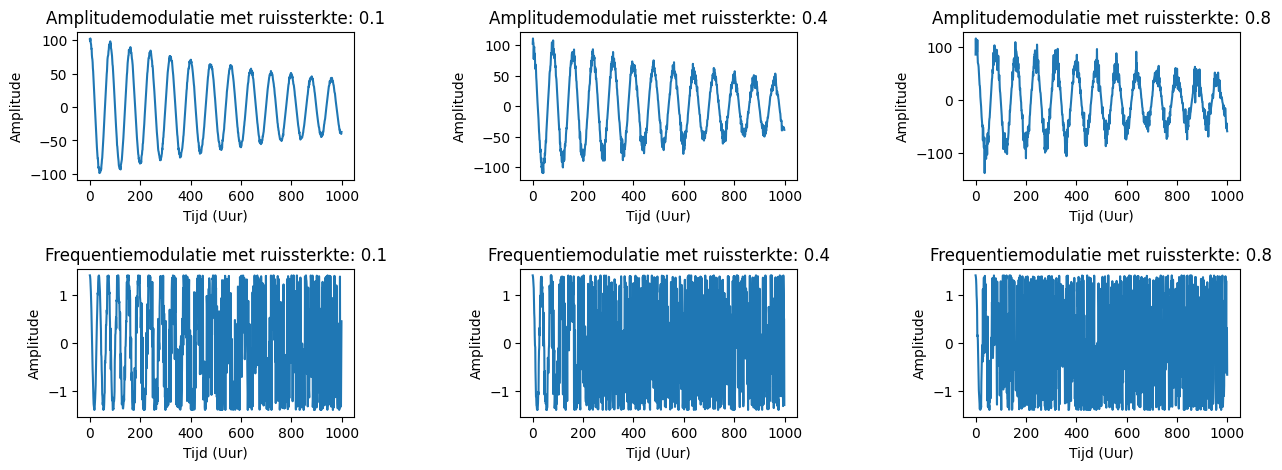

In [18]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))
for i in range(len(corrupted_signals)):
    line, = ax[0, i].plot((a_c + corrupted_signals[i]) * np.cos([2*np.pi*f*t for t in time]))
    ax[0, i].set_title('Amplitudemodulatie met ruissterkte: {}'.format([0.1, 0.4, 0.8][i]))
    ax[0, i].set_xlabel('Tijd (Uur)')
    ax[0, i].set_ylabel('Amplitude')

    line, = ax[1, i].plot(a_c * np.cos([(2*np.pi*f + corrupted_signals[i][idx])*t  for idx, t in enumerate(time)]))
    ax[1, i].set_title('Frequentiemodulatie met ruissterkte: {}'.format([0.1, 0.4, 0.8][i]))
    ax[1, i].set_xlabel('Tijd (Uur)')
    ax[1, i].set_ylabel('Amplitude')

plt.subplots_adjust(wspace=0.6, hspace=0.6)

*Opdracht 6:* Van welke kunnen we de informatie nog gebruiken? Welk type modulatie is robuuster tegen deze ruis?